In this notebook, the work of the classifier and NER model in tandem will be demonstrated, specifically the pipeline that will accept an image and text, and output a boolean indicating whether the match is correct.

In [1]:
from PIL import Image
from tqdm.auto import tqdm
import torch
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

import main

In [2]:
def display_case(text, image_path, pipeline):
    img = Image.open(image_path)
    result = pipeline(text, image_path)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Image', fontsize=12)

    plt.subplot(1, 2, 2)
    output_text = f'Text: {text}\n\nResult: {result}'
    plt.text(0.1, 0.5, output_text,
             fontsize=12,
             fontfamily='sans-serif',
             va='center')
    plt.axis('off')
    plt.title('Result', fontsize=12)

    plt.tight_layout()
    plt.show()

Let's firstly try usual cases

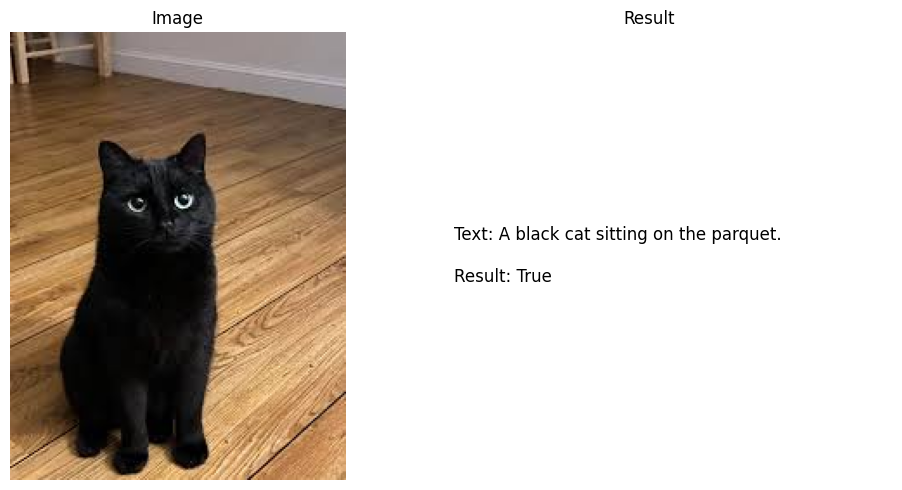

In [9]:
# Initialize pipeline
ner_model_path = "models"
image_model_path = "models/model_0.pth"
pipeline = main.AnimalPipeline(ner_model_path, image_model_path)

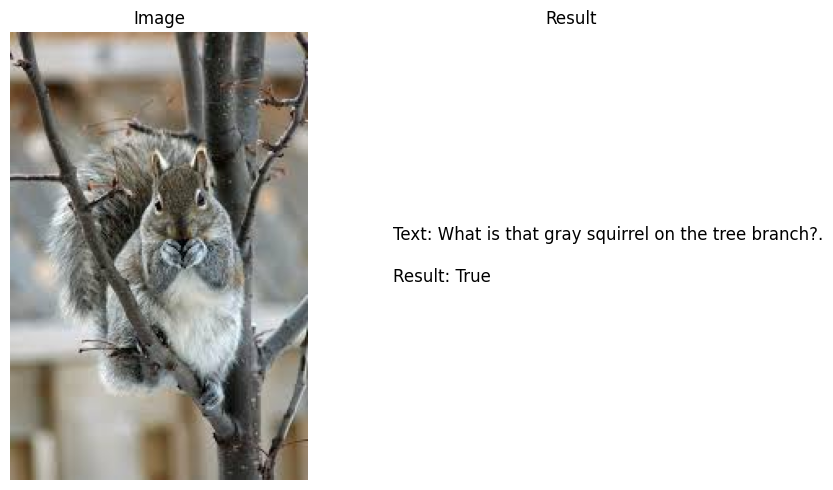

In [11]:
# Now let's try another picture

# Call the function
display_case(
    "What is that gray squirrel on the tree branch?.",
    "img/test_3.jpeg",
    pipeline
)

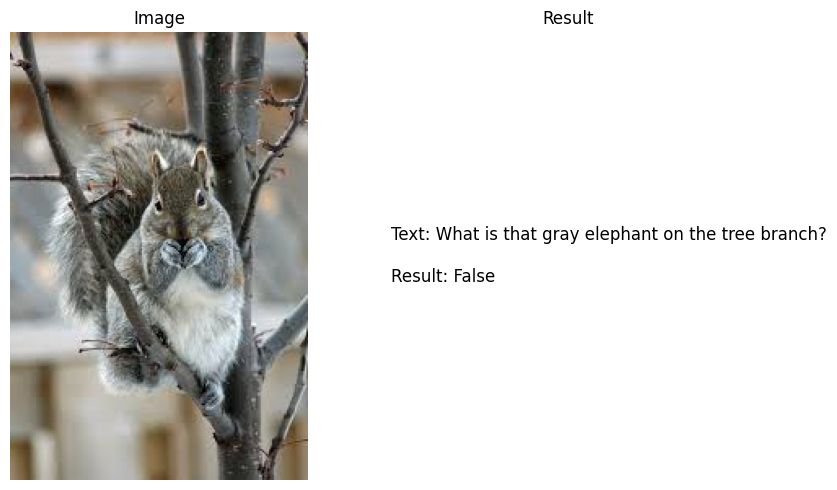

In [13]:
# Now let's input a wrong animal name, see what will be the next output

# Call the function
display_case(
    "What is that gray elephant on the tree branch?",
    "img/test_3.jpeg",
    pipeline
)

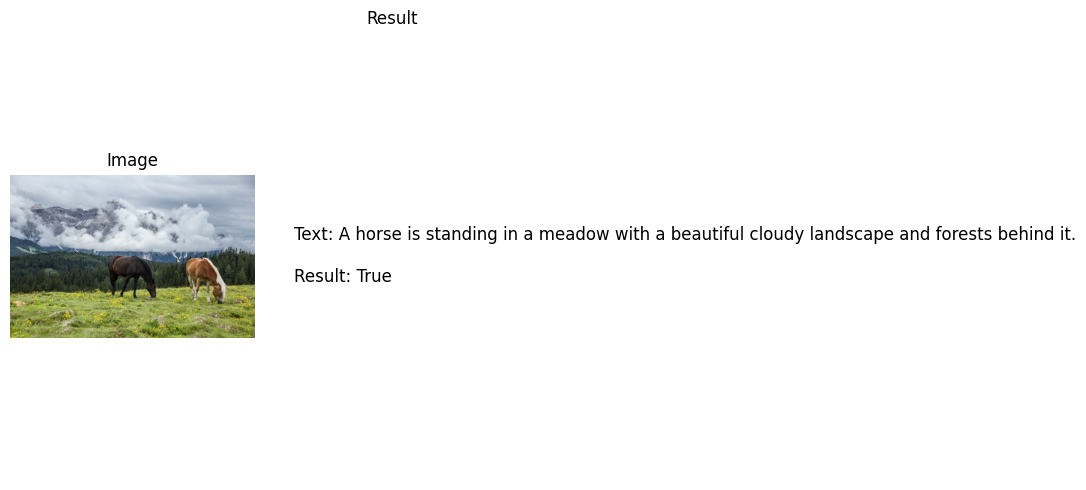

In [18]:
display_case(
    "A horse is standing in a meadow with a beautiful cloudy landscape and forests behind it.",
    "img/test_8.jpg",
    pipeline
)

Now let's try empty text inputs to the picture

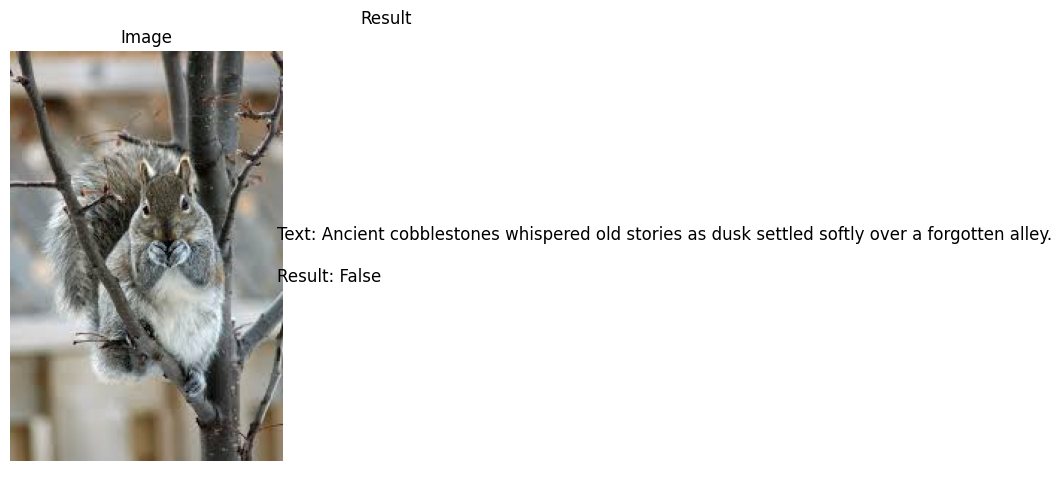

In [23]:
display_case(
    "Ancient cobblestones whispered old stories as dusk settled softly over a forgotten alley.",
    "img/test_3.jpeg",
    pipeline
)

next, we will input animal names in possesive and plural forms

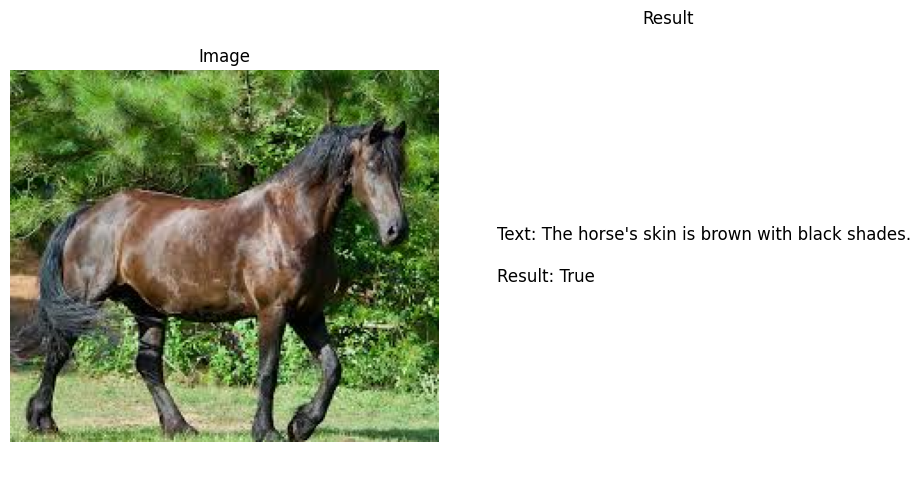

In [38]:
display_case(
    "The horse's skin is brown with black shades.",
    "img/test_7.jpeg",
    pipeline
)

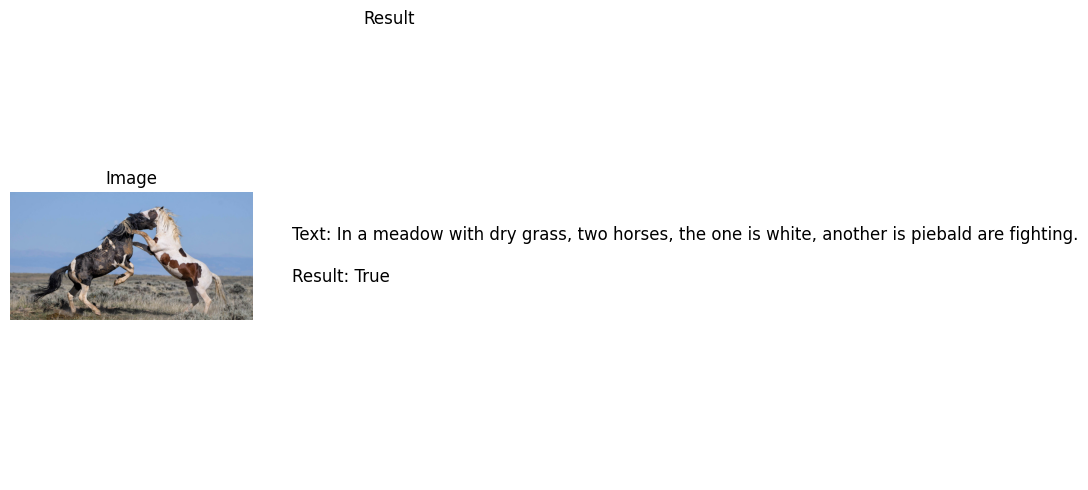

In [30]:
display_case(
    "In a meadow with dry grass, two horses, the one is white, another is piebald are fighting.",
    "img/test_6.jpg",
    pipeline
)

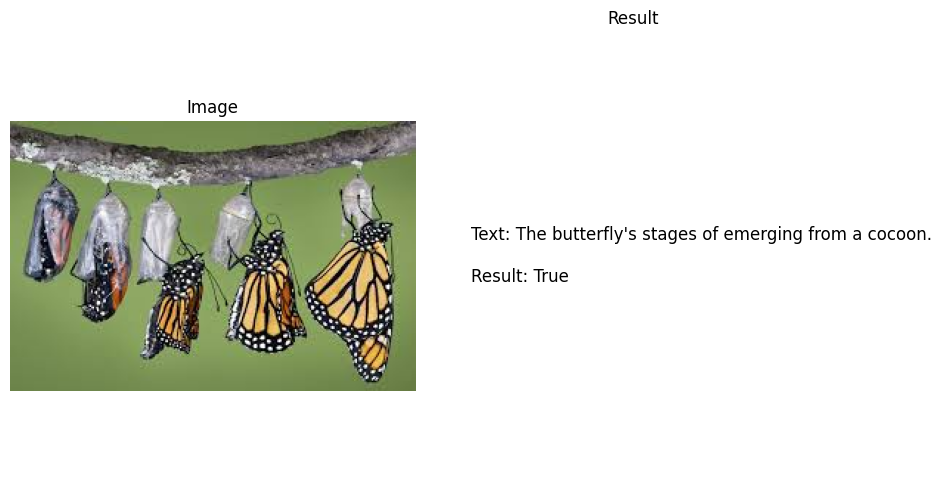

In [45]:
display_case(
    "The butterfly's stages of emerging from a cocoon.",
    "img/test_9.jpeg",
    pipeline
)

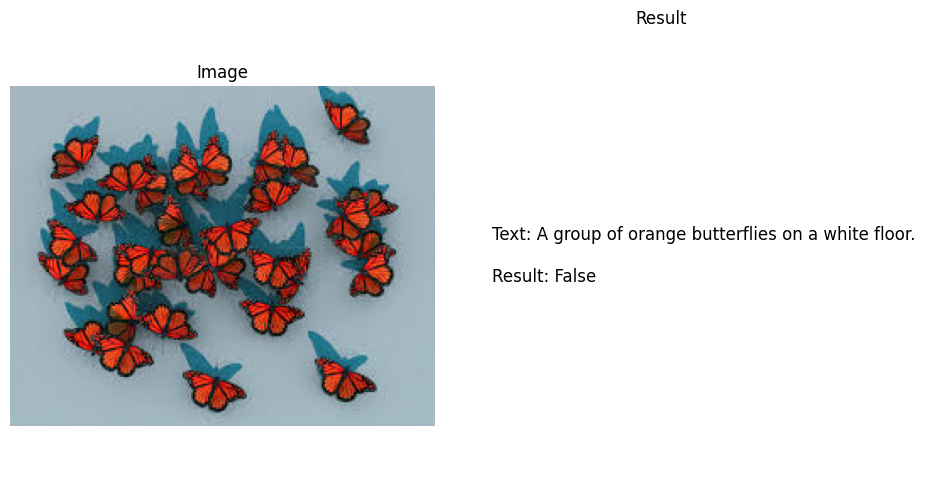

In [27]:
# Let's try to create an input for the butterfly class in plural form, that's going to be hard)

display_case(
    "A group of orange butterflies on a white floor.",
    "img/test_11.jpeg",
    pipeline
)

Now let's try to input more than one animal name to the text

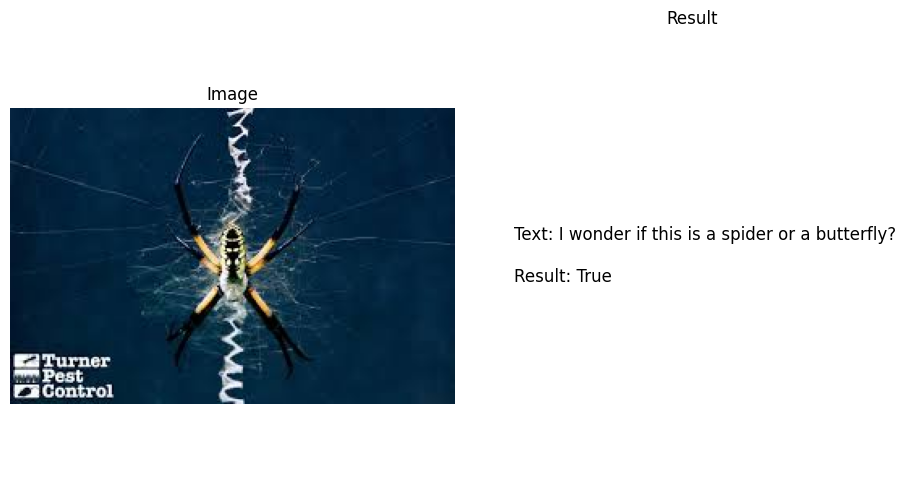

In [61]:
display_case(
    "I wonder if this is a spider or a butterfly?",
    "img/test_5.jpeg",
    pipeline
)

Returns True because out of the two words, one matches the label.

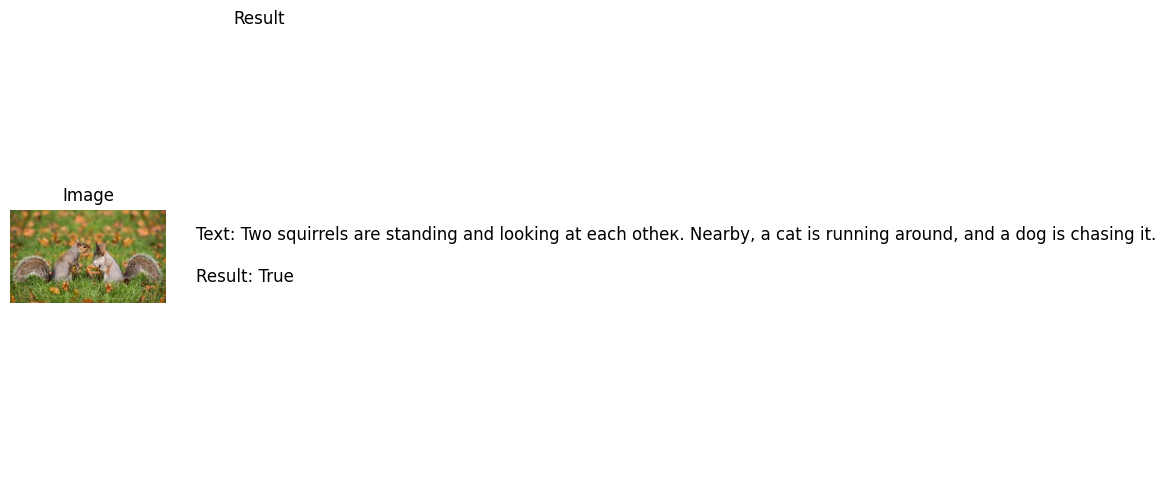

In [66]:
display_case(
    "Two squirrels are standing and looking at each otheк. Nearby, a cat is running around, and a dog is chasing it.",
    "img/test_4.jpeg",
    pipeline
)

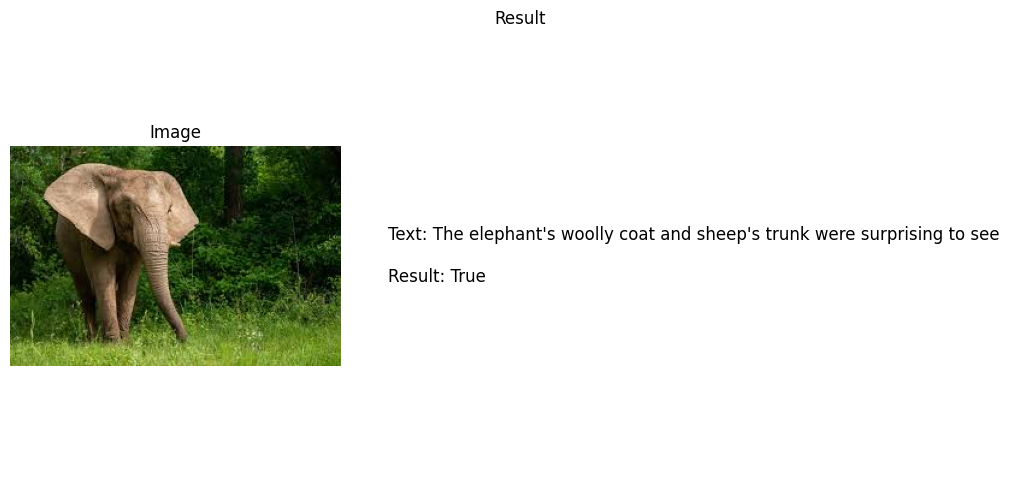

In [68]:
display_case(
    "The elephant's woolly coat and sheep's trunk were surprising to see",
    "img/test_1.jpeg",
    pipeline
)

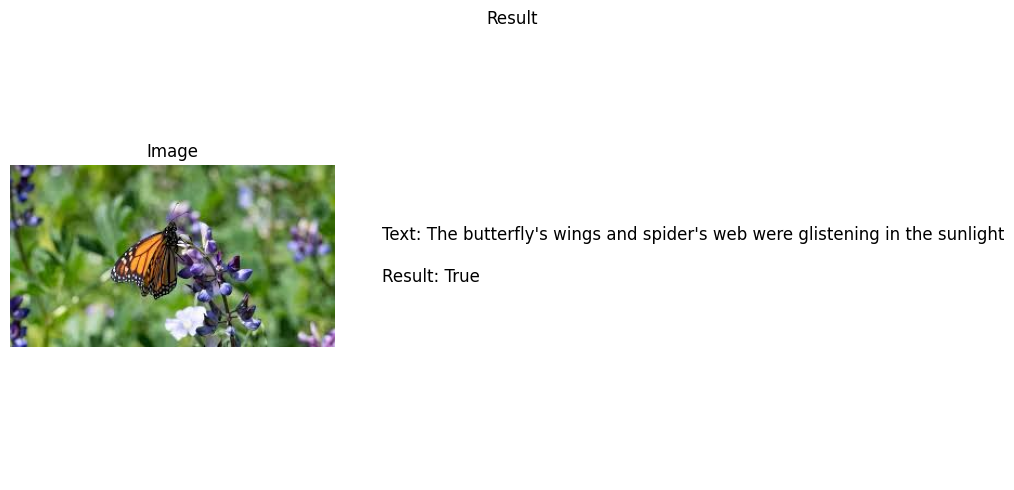

In [67]:
display_case(
    "The butterfly's wings and spider's web were glistening in the sunlight",
    "img/test_10.jpeg",
    pipeline
)

Now let's try to input a different name

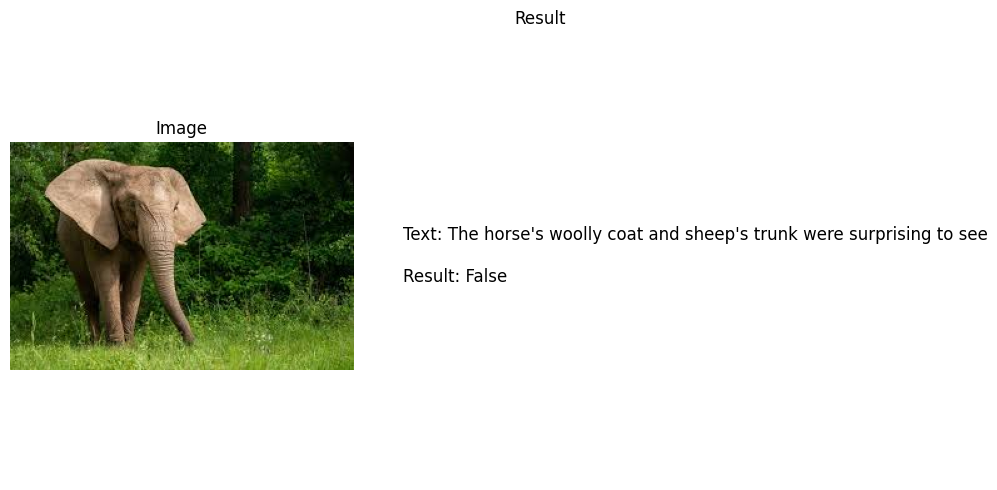

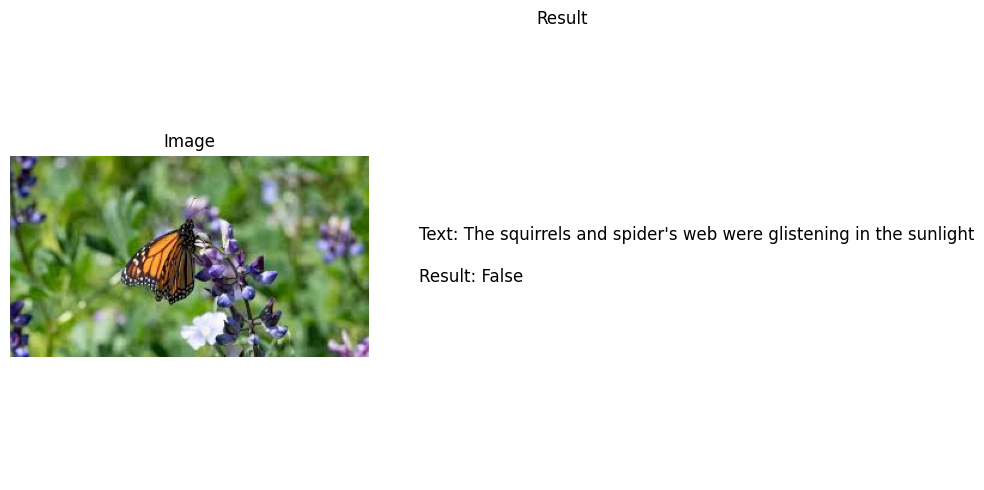

In [70]:
display_case(
    "The horse's woolly coat and sheep's trunk were surprising to see",
    "img/test_1.jpeg",
    pipeline
)
display_case(
    "The squirrels and spider's web were glistening in the sunlight",
    "img/test_10.jpeg",
    pipeline
)

The result is False because none of the animal names match the classification label(class name) in the photo

Now let's try misspeling words

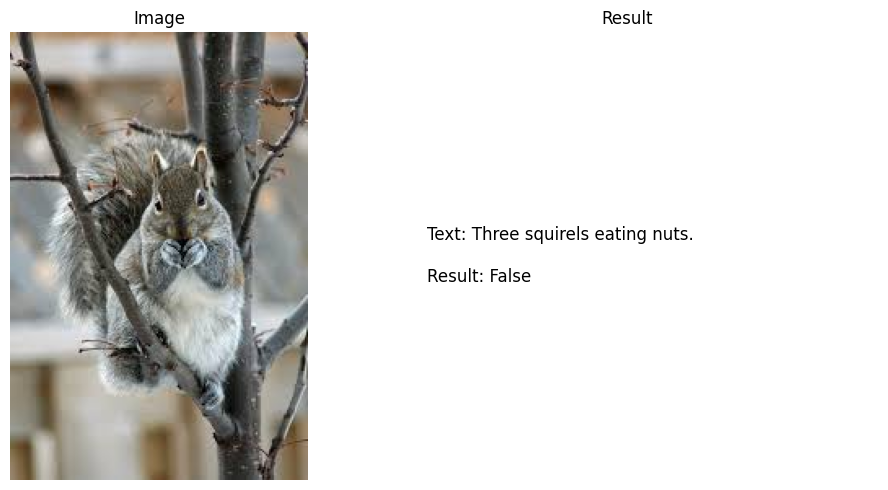

In [60]:
display_case(
    "Three squirels eating nuts.",
    "img/test_3.jpeg",
    pipeline
)

In conclusion, in most situations, the pipeline with the NER and CNN models works well, but it may have issues when the animal name is incorrectly pronounced in the text or when animal names are in plural form. However, this problem is specific only to the butterfly class. These issues can be resolved by augmenting the NER dataset with incorrect name expressions. Additionally, extra preprocessing of the pipeline can be done, especially for the plural form of the butterfly class. The same applies to incorrect word pronunciations.